In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.fft
import matplotlib.ticker as ticker

A0 = 3
f0 = 40
beta = 150
fi = 0
T = 0.5
N = 100
dt = 0.002
sigx = A0/5
x = [0]

In [ ]:
def S(t):
  return A0*t*np.exp(-(beta) * (t) ** 2) * np.sin(2*m.pi*f0*(t) + fi)

In [ ]:
t0 = 0.05
t1 = 0.02
t2 = 0
tn = t0 + dt*N
ti = np.arange(t0, tn, dt)
print(len(ti))

100


In [ ]:
epsi = np.random.normal(0, sigx, N-1)
x = np.zeros(N-1)
for i in range(N-1):
  x[i] = S(ti[i]-t0)+S(ti[i]-t1)+S(ti[i]-t2)#+epsi[i]

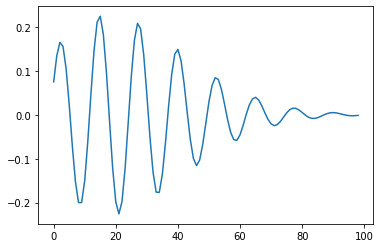

In [ ]:
plt.plot(x)

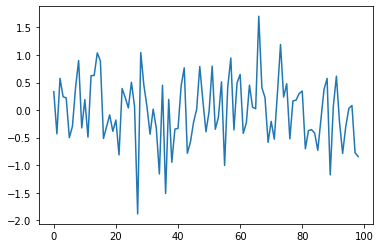

In [ ]:
epsi = np.random.normal(0, sigx, N-1)
x = np.zeros(N-1)
for i in range(N-1):
  x[i] = S(ti[i]-t0)+S(ti[i]-t1)+S(ti[i]-t2)+epsi[i]
plt.plot(x)

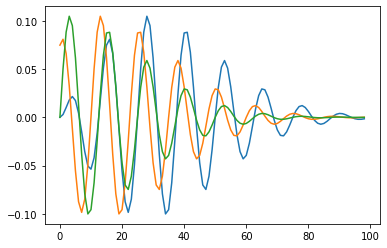

In [ ]:
s1 = np.zeros(N-1)
s2 = np.zeros(N-1)
s3 = np.zeros(N-1)
for i in range(N-1):
  s1[i] = S(ti[i]-t0)
  s2[i] = S(ti[i]-t1)
  s3[i] = S(ti[i]-t2)
plt.plot(s1)
plt.plot(s2)
plt.plot(s3)

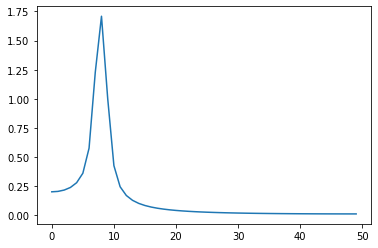

In [ ]:
ACHx = scipy.fft.rfft(x) #АЧХ суммы
plt.plot(abs(ACHx)) 

In [ ]:
s = np.zeros(N-1)
for i in range(N-1):
  if (i>65):
    s[i] = 0
  else:
    s[i] = S(ti[i])
ACHs = scipy.fft.rfft(s)

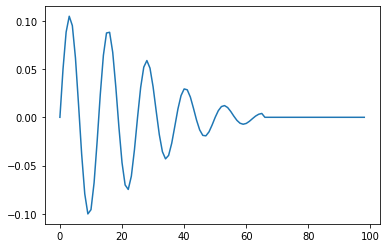

In [ ]:
plt.plot(s)

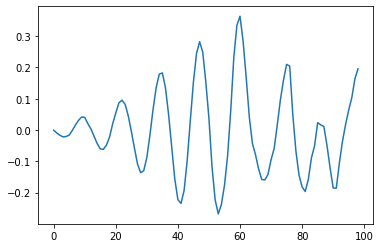

In [ ]:
VKF = np.correlate(x, s, 'same')
plt.plot(VKF)

In [ ]:
tau = 5
R1 = np.zeros(N//tau)
m = 0
for i in range(0, N-1, tau):
  for j in range(0, N-i, tau):
    R1[m] += x[j+i]*s[j]
  R1[m]=R1[m]/(N-i) 
  m+=1

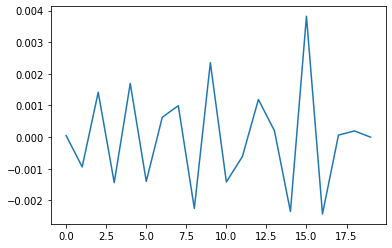

In [ ]:
plt.plot(R1)

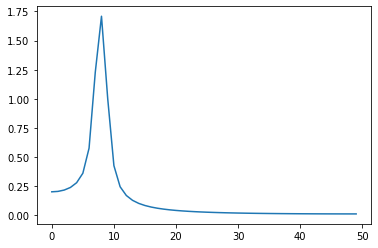

In [ ]:
plt.plot(abs(ACHs)) #АЧХ Берлаге

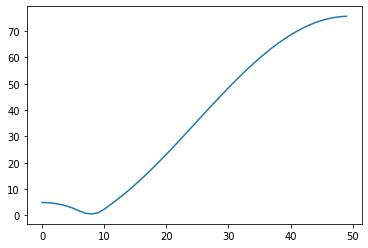

In [ ]:
# зададим фильтр в частотной области
ACHh = 1/ACHs
plt.plot(abs(ACHh))

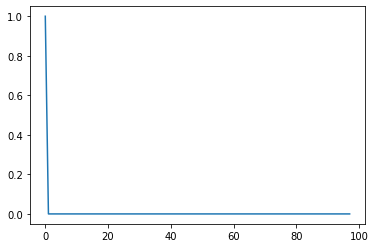

<Figure size 1080x720 with 0 Axes>

In [ ]:
Xout = scipy.fft.irfft(ACHh*ACHx) # подействуем фильтром и посмотрим на выходную величину
plt.plot(Xout)
plt.figure(figsize=(15,10))
plt.show()